In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

import json

import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from sklearn import preprocessing

In [4]:
tweets = pd.read_csv('/code/src/distribuicoes/distribuitionRelated.csv')

lat = tweets['latitude'].values
long = tweets['longitude'].values

datesDistribuition = tweets.drop(columns=['latitude', 'longitude'])
datesDistribuition.describe()

06-07        13-07        16-06        20-07        22-06  \
count  3191.000000  3191.000000  3191.000000  3191.000000  3191.000000   
mean      0.167972     0.122846     0.139768     0.132874     0.164839   
std       0.460328     0.439380     0.449194     0.412068     0.478796   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       3.000000     5.000000     5.000000     4.000000     5.000000   

             29-06        10-08        18-08        24-08        01-09  \
count  3191.000000  3191.000000  3191.000000  3191.000000  3191.000000   
mean      0.171106     0.113757     0.107176     0.099342     0.097148   
std       0.550456     0.388594     0.353817     0.360906     0.325453   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       6.000000     6.000000     3.000000     7.000000     4.000000   

             07-09        15-09        21-09  
count  3191.000000  3191.000000  3191.000000  
mean      0.066123     0.043560     0.036352  
std       0.278289     0.214626     0.207827  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       3.000000     2.000000     3.000000

In [5]:
labels = []

for column in tweets:
    values = tweets[column].values
    count = 0
    for label in values:
        try:
            labels[count] = labels[count] + column+ ":" +str(label) + "\n"
        except:
            labels.append(column+ ":"+str(label)+"\n")
        labels[count] = labels[count].replace("-", "/")
        count += 1

In [6]:
mapa = folium.Map(location=[-23.5489,-46.6388],zoom_start=10)

for la,lo,label in zip(lat,long,labels):
    folium.Circle([la, lo], 1000, fill=True, popup=label).add_to(mapa)

mapa

In [7]:
def getCoordinates(dataframe, column):
    coordinates = []

    for latitude, longitude, value in zip(dataframe.latitude, dataframe.longitude, dataframe[column]):
        if(value > 0):
            coordinates.append([latitude, longitude, value])
    
    return coordinates

In [8]:
def plotHeatMap(dataframe, column):
    mapa = folium.Map(location=[-23.5489,-46.6388],zoom_start=6)
    
    coordinates = getCoordinates(dataframe, column)
    
    HeatMap(coordinates).add_to(mapa)
    return mapa

In [9]:
plotHeatMap(tweets, '16-06')

In [10]:
plotHeatMap(tweets, '22-06')

In [11]:
plotHeatMap(tweets, '29-06')

In [12]:
plotHeatMap(tweets, '20-07')

In [13]:
plotHeatMap(tweets, '06-07')

In [14]:
plotHeatMap(tweets, '13-07')

In [15]:
plotHeatMap(tweets, '20-07')

In [16]:
def parseData(row):
    row['Data'] = row['Data'].replace(" ", "/")
    months = ['fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set']
    key = 2
    for month in months:
        row['Data'] = row['Data'].replace(month, "0"+str(key)+'/2020')
        key += 1
        
    return row['Data']

In [68]:
covid = pd.read_csv('/code/src/distribuicoes/covid-19-sp.csv')

#remover colunas unamed
covid.drop(covid.columns[covid.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

covid['Data'] = covid.apply (lambda row: parseData(row), axis=1)

covid.head(10)

Data  casos  casosDia  obitos
0  26/02/2020      1         1     NaN
1  27/02/2020      0         0     NaN
2  28/02/2020      0         0     NaN
3  29/02/2020      2         1     NaN
4  01/03/2020      0         0     NaN
5  02/03/2020      0         0     NaN
6  03/03/2020      0         0     NaN
7  04/03/2020      3         1     NaN
8  05/03/2020      6         3     NaN
9  06/03/2020     10         4     NaN

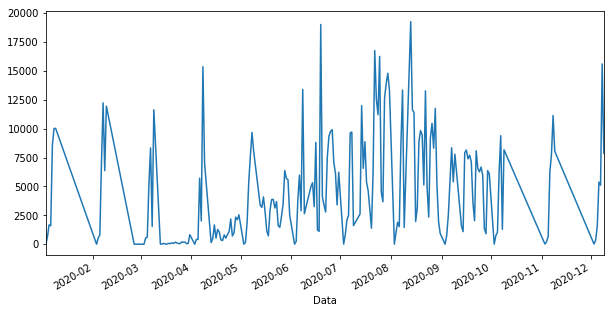

In [91]:
covid.groupby('Data', sort=False)['casosDia'].sum().plot(kind="line", figsize=(10, 5))
plt.show()

In [19]:
#def createCity(row):
#    try:
#        locator = Nominatim(user_agent="myGeocoder")
#        coordinates = str(row['latitude'])+', '+str(row['longitude'])
#        location = locator.reverse(coordinates)
#        result = location.raw
#        print(coordinates, result['address']['city'])
#        return result['address']['city']
#    except:
#        return "Indeterminado"

In [20]:
#Usa um serviço de reverse geolocation para buscar a cidade e agrupar dados, salvo num csv
#tweets['City'] = tweets.apply (lambda row: createCity(row), axis=1)
#tweets.to_csv('distribuitionWithCity.csv', index = False)

In [110]:
cities = pd.read_csv('distribuitionWithCity.csv')

def getCity(city):
    dataframe = cities[cities['City'] == city]
    
    dataframe = dataframe[['16-06', '22-06', '29-06', '06-07', '13-07', '20-07', '10-08', '18-08', '24-08', '01-09', '07-09', '15-09', '21-09']]

    #normaliza os dados analisados no período para são paulo
    dataframe = dataframe.apply(lambda x: x/x.max(), axis=0)

    return dataframe.sum()

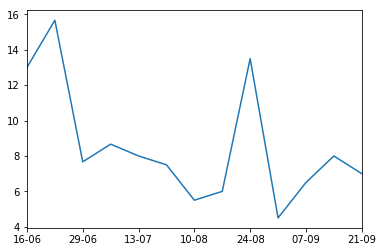

In [111]:
tweetsNormalizados = getCity("São Paulo")
tweetsNormalizados.plot(kind="line")
plt.show()

In [108]:
def plotCovid(start, end):
    df = covid
    df['Data'] = pd.to_datetime(df['Data'])
    df = df.sort_values(by="Data")
    df = df[(df['Data'] >= start) & (df['Data'] <= end)]
    
    df.groupby('Data', sort=False)['casosDia'].sum().plot(kind="line", figsize=(15, 5))
    plt.show()

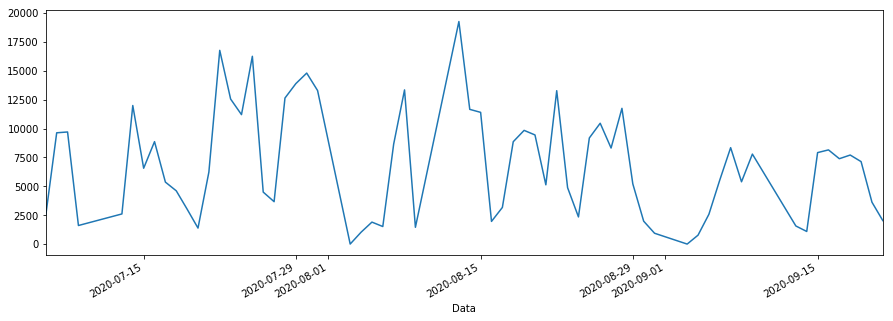

In [109]:
plotCovid("2020-07-06", "2020-09-21")

In [112]:
tweetsNormalizados

16-06    13.000000
22-06    15.666667
29-06     7.666667
06-07     8.666667
13-07     8.000000
20-07     7.500000
10-08     5.500000
18-08     6.000000
24-08    13.500000
01-09     4.500000
07-09     6.500000
15-09     8.000000
21-09     7.000000
dtype: float64